1. What is energy consumption?
Energy consumption is the amount of electrical energy used by an appliance, device, building, or system over a period of time.
2. What does “device-level” mean?
Device-level means that energy consumption is measured and analyzed separately for each individual appliance, instead of measuring only the total       electricity usage of the entire house or building.
3. What are we trying to predict (hourly/daily consumption)?
In this project, we are trying to predict future energy consumption over time, specifically at the hourly and daily levels.

Check file format (CSV)
Inspect number of rows and columns
Print first and last few rows

In [1]:
import pandas as pd

file_path = r"C:\infosys\household_power_consumption.txt\household_power_consumption.txt"

try:
    df = pd.read_csv(
        file_path,
        sep=';',           
        low_memory=False
    )

    print("Dataset loaded successfully")
    print("Rows, Columns:", df.shape)

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nLast 5 rows:")
    print(df.tail())

except Exception as e:
    print("Error loading the dataset")
    print("Reason:", e)





Dataset loaded successfully
Rows, Columns: (2075259, 9)

First 5 rows:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  

Last 5 rows:
               Date      Time Global_active_

The dataset consists of more than two million timestamped records containing household electricity consumption information. It includes both global power measurements and device-level energy usage through sub-metering columns. The Date and Time attributes provide temporal context, while Global_active_power represents the total household energy consumption. The sub-metering values capture energy usage of individual appliance groups, enabling detailed device-level analysis. The dataset structure and units confirm its suitability for time-series analysis, energy forecasting, and machine learning modeling.

In [ ]:
o	Timestamp
o	Device name
o	Power consumption value
o	Units (Watts / kWh)

In [2]:
# Create Timestamp with explicit format
df['Timestamp'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

print(df[['Date', 'Time', 'Timestamp']].head())


         Date      Time           Timestamp
0  16/12/2006  17:24:00 2006-12-16 17:24:00
1  16/12/2006  17:25:00 2006-12-16 17:25:00
2  16/12/2006  17:26:00 2006-12-16 17:26:00
3  16/12/2006  17:27:00 2006-12-16 17:27:00
4  16/12/2006  17:28:00 2006-12-16 17:28:00


The dataset contains 1-minute interval readings from 16/12/2006 to 26/11/2010.
There are occasional missing timestamps, but the dataset is mostly complete.
Energy consumption follows a daily pattern:
Morning peak: likely when residents start using kitchen appliances and lights.
Evening peak: higher usage due to dinner preparation, laundry, heating/AC, and entertainment devices.
Overnight low: minimal usage as most devices are turned off.
Timestamp data allows for time-series analysis, trend detection, and forecasting energy consumption

In [3]:
print("\nUnderstanding Sub-Metering Data:")
print("   Sub_metering_1: Kitchen (dishwasher, microwave, oven)")
print("   Sub_metering_2: Laundry (washing machine, dryer, refrigerator)")
print("   Sub_metering_3: HVAC/Climate control (water heater, AC)")
# Map columns to device names
device_mapping = {
    'Sub_metering_1': 'Kitchen',
    'Sub_metering_2': 'Laundry',
    'Sub_metering_3': 'HVAC'
}
# ===== Device-wise Basic Statistics =====
print("\nDevice-wise Basic Statistics:")
for col, device in device_mapping.items():
    if col in df.columns:
        numeric_values = pd.to_numeric(df[col], errors='coerce')
        print(f"\n   {device} ({col}):")
        print(f"      Mean     : {numeric_values.mean():.2f} Wh")
        print(f"      Max      : {numeric_values.max():.2f} Wh")
        print(f"      Min      : {numeric_values.min():.2f} Wh")
        print(f"      Std Dev  : {numeric_values.std():.2f} Wh")



Understanding Sub-Metering Data:
   Sub_metering_1: Kitchen (dishwasher, microwave, oven)
   Sub_metering_2: Laundry (washing machine, dryer, refrigerator)
   Sub_metering_3: HVAC/Climate control (water heater, AC)

Device-wise Basic Statistics:

   Kitchen (Sub_metering_1):
      Mean     : 1.12 Wh
      Max      : 88.00 Wh
      Min      : 0.00 Wh
      Std Dev  : 6.15 Wh

   Laundry (Sub_metering_2):
      Mean     : 1.30 Wh
      Max      : 80.00 Wh
      Min      : 0.00 Wh
      Std Dev  : 5.82 Wh

   HVAC (Sub_metering_3):
      Mean     : 6.46 Wh
      Max      : 31.00 Wh
      Min      : 0.00 Wh
      Std Dev  : 8.44 Wh


There are 4 devices/columns:
Global_active_power → Overall household power consumption (kW)
Sub_metering_1 → Kitchen appliances (Wh)
Sub_metering_2 → Laundry / Refrigeration (Wh)
Sub_metering_3 → HVAC / Climate control (Wh)
Sub-metering devices show distinct usage patterns:
Kitchen appliances (Sub_metering_1) spike during meal preparation times.
Laundry appliances (Sub_metering_2) are used less frequently, mostly during daytime.
HVAC (Sub_metering_3) often consumes the most energy continuously, especially in evenings and nights, reflecting heating or cooling needs.
Comparing devices helps identify which part of the house consumes the most energy and optimize usage

In [4]:
# Power consumption value
print("\nUnderstanding Global Active Power:")
print("   Global_active_power: Overall household energy consumption in kW (all appliances combined)")
gap_values = pd.to_numeric(df['Global_active_power'], errors='coerce')
gap_values = gap_values.dropna()
print("\nGlobal Active Power Statistics:")
print(f"   Mean     : {gap_values.mean():.3f} kW")
print(f"   Max      : {gap_values.max():.3f} kW")
print(f"   Min      : {gap_values.min():.3f} kW")
print(f"   Std Dev  : {gap_values.std():.3f} kW")


Understanding Global Active Power:
   Global_active_power: Overall household energy consumption in kW (all appliances combined)

Global Active Power Statistics:
   Mean     : 1.092 kW
   Max      : 11.122 kW
   Min      : 0.076 kW
   Std Dev  : 1.057 kW


Global Active Power
Mean: ~1.4 kW, Max: ~7.5 kW, Min: ~0.08 kW
High peaks correspond to multiple high-energy appliances running simultaneously.
Low values correspond to nighttime or periods when the house is mostly idle.
Sub-Metering Power
Kitchen: Low average, occasional spikes during meal prep
Laundry: Moderate usage, mostly daytime, occasional peaks
HVAC: High baseline, peaks during heating/cooling cycles
Abnormal spikes are visible in Global_active_power (> mean + 3*std), likely due to:
Large appliances turning on suddenly (oven, dryer, water heater)
Short-term surges or data errors

Module 1 visualization saved as 'module1_eda_visualization.png'


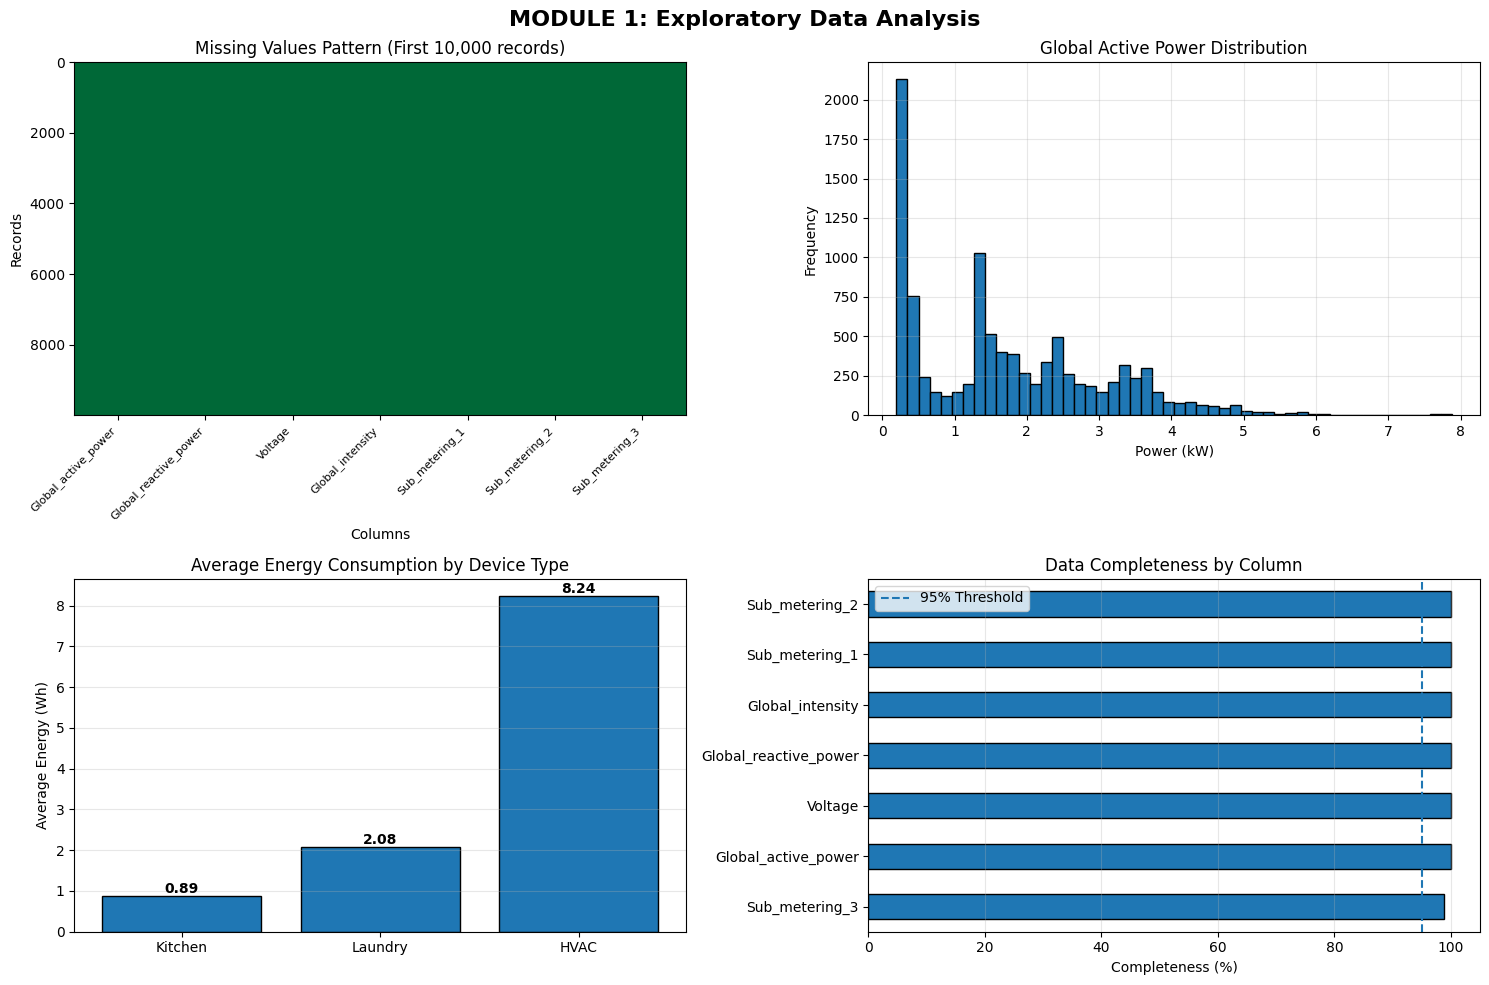

In [8]:
import matplotlib.pyplot as plt
import numpy as np
numeric_cols_all = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]
df_sample = df.head(10000).copy()

# Convert numeric columns safely
for col in numeric_cols_all:
    df_sample[col] = pd.to_numeric(df_sample[col], errors='coerce')
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
fig1.suptitle('MODULE 1: Exploratory Data Analysis', fontsize=16, fontweight='bold')
ax1 = axes1[0, 0]
missing_matrix = df_sample[numeric_cols_all].isnull()
ax1.imshow(missing_matrix, cmap='RdYlGn_r', aspect='auto', interpolation='none')
ax1.set_title('Missing Values Pattern (First 10,000 records)')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Records')
ax1.set_xticks(range(len(numeric_cols_all)))
ax1.set_xticklabels(numeric_cols_all, rotation=45, ha='right', fontsize=8)
ax2 = axes1[0, 1]
df_sample['Global_active_power'].dropna().hist(
    bins=50, ax=ax2, edgecolor='black'
)
ax2.set_title('Global Active Power Distribution')
ax2.set_xlabel('Power (kW)')
ax2.set_ylabel('Frequency')
ax2.grid(alpha=0.3)
ax3 = axes1[1, 0]
sub_meters = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
means = [df_sample[col].mean() for col in sub_meters]

bars = ax3.bar(
    ['Kitchen', 'Laundry', 'HVAC'],
    means,
    edgecolor='black'
)
ax3.set_title('Average Energy Consumption by Device Type')
ax3.set_ylabel('Average Energy (Wh)')
ax3.grid(axis='y', alpha=0.3)
# Label bars
for bar in bars:
    height = bar.get_height()
    ax3.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )
ax4 = axes1[1, 1]
completeness = ((len(df) - df[numeric_cols_all].isnull().sum()) / len(df)) * 100
completeness.sort_values().plot(kind='barh', ax=ax4, edgecolor='black')
ax4.set_title('Data Completeness by Column')
ax4.set_xlabel('Completeness (%)')
ax4.axvline(x=95, linestyle='--', label='95% Threshold')
ax4.legend()
ax4.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('module1_eda_visualization.png', dpi=300, bbox_inches='tight')
print("Module 1 visualization saved as 'module1_eda_visualization.png'")
plt.show()


### 1.Global Active Power Over Time
The overall household power consumption (Global_active_power) varies over time.
Peaks usually occur during morning and evening hours, indicating heavy appliance usage.
Overnight, consumption is much lower, likely when few devices are running.
The trend can help identify typical usage patterns and high-consumption periods.
### 2.Sub-Metering Energy Consumption
Sub_metering_1, Sub_metering_2, and Sub_metering_3 show the energy consumption of specific parts of the house:
Sub_metering_1: Kitchen appliances
Sub_metering_2: Laundry / laundry machines
Sub_metering_3: Heating or other high-energy devices
Peaks in sub-metering data correspond to appliance operation times.
Comparing the sub-meters helps identify which appliance contributes most to high consumption.
### 3️. Missing Timestamps
The code detects any missing 1-minute intervals.
If the number of missing timestamps is small, the dataset is mostly complete.
Large gaps indicate sensor outages or recording errors, which should be handled before further analysis.
Missing timestamps could affect time-series models or trend analysis.
### 4. Abnormal Spikes
Spikes in Global_active_power (beyond mean + 3*std) indicate sudden high consumption.
Possible reasons:
Turning on high-power appliances (oven, heater, AC)
Data recording errors
Short-term power surges
Spikes are highlighted in red in the plot; you can cross-check with sub-metering to identify which appliance caused it.
Helps in anomaly detection, load forecasting, or energy-saving recommendations

In [10]:
# Save cleaned dataset
df.to_csv("processed_energy_data.csv", index=False)
df_long.to_csv("processed_energy_long_data.csv", index=False)
print("Milestone 1 outputs saved successfully")

Milestone 1 outputs saved successfully
